In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam

In [2]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()
xtrain = xtrain/255
xtest = xtest/255

In [4]:
len(xtrain)

60000

In [5]:
len(xtest)

10000

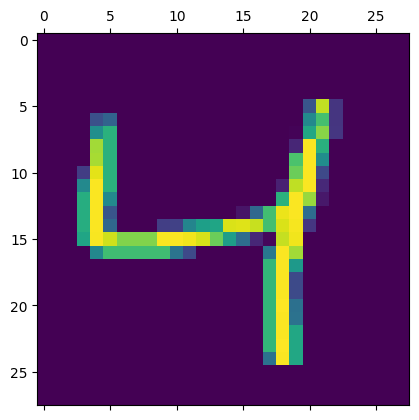

In [3]:
plt.matshow(xtrain[2])

In [7]:
ytrain[2]

4

In [8]:
 xtrain.shape

(60000, 28, 28)

In [4]:
xtrainflatten = xtrain.reshape(len(xtrain),28*28)

In [5]:
xtestflatten = xtest.reshape(len(xtest),28*28)

In [6]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(xtrainflatten,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4669 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3034 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2833 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2733 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9261


In [17]:
model.evaluate(xtestflatten,ytest)

313/313 [==============================] - 1s 1ms/step - loss: 0.2685 - accuracy: 0.9246


[0.2684979736804962, 0.9246000051498413]

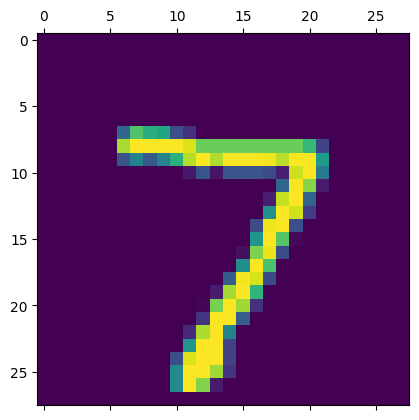

In [18]:
plt.matshow(xtest[0]) 

In [19]:
ypredict = model.predict(xtestflatten)
ypredict[0]

313/313 [==============================] - 0s 966us/step


array([2.5446746e-02, 1.9249383e-07, 6.6367827e-02, 9.4822407e-01,
       1.3618564e-03, 8.6931929e-02, 2.3259222e-06, 9.9977303e-01,
       8.2147181e-02, 6.2784475e-01], dtype=float32)

In [20]:
np.argmax(ypredict[0])

7

In [21]:
ypredict[1]

array([5.1482481e-01, 3.1916155e-03, 9.9920034e-01, 4.0821946e-01,
       4.8560239e-10, 8.6056376e-01, 8.6311877e-01, 5.3765347e-13,
       1.6313189e-01, 3.4814243e-09], dtype=float32)

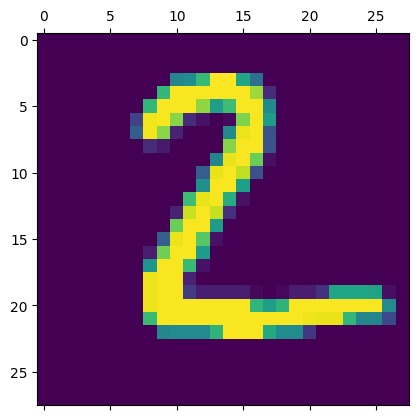

In [22]:
plt.matshow(xtest[1])

In [23]:
ypredict[1]

array([5.1482481e-01, 3.1916155e-03, 9.9920034e-01, 4.0821946e-01,
       4.8560239e-10, 8.6056376e-01, 8.6311877e-01, 5.3765347e-13,
       1.6313189e-01, 3.4814243e-09], dtype=float32)

In [24]:
np.argmax(ypredict[1])
ypredictlabels = [np.argmax(i) for i in ypredict]

In [25]:
cm = tf.math.confusion_matrix(ytest,ypredictlabels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1108,    3,    2,    0,    2,    4,    2,   14,    0],
       [   6,    7,  931,   17,    6,    2,   13,   10,   35,    5],
       [   4,    0,   19,  932,    0,   17,    2,   10,   18,    8],
       [   2,    1,    4,    2,  900,    0,   15,    5,    9,   44],
       [  12,    3,    4,   44,    8,  759,   18,    8,   29,    7],
       [  14,    3,    4,    2,    7,    9,  916,    2,    1,    0],
       [   1,    5,   22,   10,    6,    0,    0,  949,    3,   32],
       [  11,    6,    6,   31,    8,   20,   11,   11,  860,   10],
       [  12,    7,    1,   12,   21,    5,    0,   19,    5,  927]])>

In [26]:
model1 = keras.Sequential([
    keras.layers.Dense(785,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])

model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model1.fit(xtrainflatten,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3322 - accuracy: 0.9035
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1668 - accuracy: 0.9506
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1057 - accuracy: 0.9687
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0724 - accuracy: 0.9779
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0524 - accuracy: 0.9835


In [10]:
model1 = keras.Sequential([
    keras.layers.Dense(533,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])

model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model1.fit(xtrainflatten,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3411 - accuracy: 0.9032
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1709 - accuracy: 0.9499
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1122 - accuracy: 0.9670
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0790 - accuracy: 0.9765
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0581 - accuracy: 0.9825


In [14]:
model1.evaluate(xtestflatten,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9755


[0.07599087059497833, 0.9754999876022339]

In [15]:
ypredict1 =  model1.predict(xtestflatten)
ypredictlabels1 = [np.argmax(i) for i in ypredict1]
cm1 = tf.math.confusion_matrix(labels=ytest,predictions=ypredictlabels1)
cm1

313/313 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    5,    1,    0,    3,    9,    1,    3,    3],
       [   0, 1129,    3,    0,    0,    1,    1,    0,    1,    0],
       [   0,    3, 1009,    3,    1,    1,    2,    6,    7,    0],
       [   0,    0,    4,  983,    0,    3,    0,    9,    5,    6],
       [   0,    0,    7,    1,  954,    0,    2,    4,    1,   13],
       [   2,    1,    0,    9,    1,  865,    5,    1,    5,    3],
       [   4,    3,    2,    1,    2,    3,  937,    1,    5,    0],
       [   1,    7,   10,    1,    1,    0,    0,  999,    1,    8],
       [   2,    3,    4,    4,    3,    3,    2,    4,  946,    3],
       [   1,    6,    0,    4,    9,    3,    1,    5,    2,  978]])>

In [31]:
# Access the optimizer
optimizer = model.optimizer

# Get the current learning rate
current_learning_rate = optimizer.learning_rate.numpy()

print(f"The current learning rate is: {current_learning_rate}")

The current learning rate is: 0.0010000000474974513


In [37]:
#with learning rate = 0.002
model2 = keras.Sequential([
    keras.layers.Dense(533,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])
opt = Adam(learning_rate=0.002)
model2.compile(
    optimizer = opt,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model2.fit(xtrainflatten,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2784 - accuracy: 0.9177
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1185 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0722 - accuracy: 0.9779
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0486 - accuracy: 0.9846
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0324 - accuracy: 0.9897


In [38]:
model2.evaluate(xtestflatten,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0702 - accuracy: 0.9782


[0.07016124576330185, 0.9782000184059143]

In [39]:
ypredict2 =  model2.predict(xtestflatten)
ypredictlabels2 = [np.argmax(i) for i in ypredict2]
cm2 = tf.math.confusion_matrix(labels=ytest,predictions=ypredictlabels2)
cm2

313/313 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    1,    2,    1,    3,    1,    1,    1,    0],
       [   0, 1127,    2,    1,    0,    1,    2,    1,    1,    0],
       [   2,    2, 1014,    4,    1,    0,    1,    4,    4,    0],
       [   0,    0,    5,  993,    0,    4,    0,    2,    1,    5],
       [   2,    0,    3,    1,  963,    0,    2,    1,    0,   10],
       [   3,    0,    0,    7,    1,  876,    3,    0,    1,    1],
       [   5,    2,    1,    1,    4,    6,  938,    0,    1,    0],
       [   2,    3,   11,    5,    1,    0,    0, 1001,    0,    5],
       [   3,    2,    3,    8,    9,    9,    4,    3,  928,    5],
       [   3,    2,    0,   10,   14,    4,    1,    2,    0,  973]])>

In [41]:
#learning rate = 0.07
model3 = keras.Sequential([
    keras.layers.Dense(533,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])
opt = Adam(learning_rate=0.007)
model3.compile(
    optimizer = opt,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model3.fit(xtrainflatten,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2146 - accuracy: 0.9352
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0981 - accuracy: 0.9696
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0800 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0730 - accuracy: 0.9772
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0621 - accuracy: 0.9809


In [16]:
# Define a function to create and train the model with a specific learning rate
def create_and_train_model(learning_rate):
    model = keras.Sequential([
        keras.layers.Dense(533, input_shape=(784,), activation='sigmoid'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(xtrainflatten, ytrain, epochs=5, verbose=0)
    return model, history



In [21]:
# Define a range of learning rates to try
learning_rates = [0.001, 0.002, 0.004, 0.007, 0.01, 0.05, 0.07, 0.1, 0.5]

# Store results
results = {}
# Iterate through different learning rates
for lr in learning_rates:
    model, history = create_and_train_model(lr)
    test_loss, test_accuracy = model.evaluate(xtestflatten, ytest, verbose=0)
    results[lr] = {'model': model, 'history': history, 'test_loss': test_loss, 'test_accuracy': test_accuracy}

# Find the best learning rate based on test accuracy
best_lr = max(results, key=lambda lr: results[lr]['test_accuracy'])

# Print results
for lr, result in results.items():
    print(f"Learning Rate: {lr}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"Test Loss: {result['test_loss']:.4f}")
    print("="*20)

print(f"The best learning rate is: {best_lr}")

Learning Rate: 0.001
Test Accuracy: 0.9771
Test Loss: 0.0738
Learning Rate: 0.002
Test Accuracy: 0.9817
Test Loss: 0.0623
Learning Rate: 0.004
Test Accuracy: 0.9798
Test Loss: 0.0721
Learning Rate: 0.007
Test Accuracy: 0.9700
Test Loss: 0.1099
Learning Rate: 0.01
Test Accuracy: 0.9676
Test Loss: 0.1314
Learning Rate: 0.05
Test Accuracy: 0.8928
Test Loss: 0.6140
Learning Rate: 0.07
Test Accuracy: 0.8852
Test Loss: 0.5972
Learning Rate: 0.1
Test Accuracy: 0.8550
Test Loss: 0.5623
Learning Rate: 0.5
Test Accuracy: 0.7862
Test Loss: 7.0532
The best learning rate is: 0.002


Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3043 - accuracy: 0.9107 - val_loss: 0.1677 - val_accuracy: 0.9494
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1352 - accuracy: 0.9595 - val_loss: 0.1130 - val_accuracy: 0.9656
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0829 - accuracy: 0.9748 - val_loss: 0.0846 - val_accuracy: 0.9756
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0558 - accuracy: 0.9823 - val_loss: 0.0820 - val_accuracy: 0.9755
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0363 - accuracy: 0.9888 - val_loss: 0.0831 - val_accuracy: 0.9754
Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3027 - accuracy: 0.9090 - val_loss: 0.1897 - val_accuracy: 0.9455
Epoch 2/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1371 - accuracy: 0.9585 - val_loss: 0.1246 - val_accuracy: 0.9610

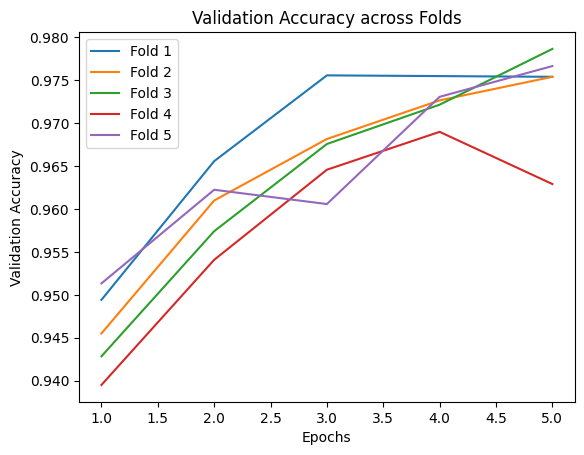

In [22]:
num_folds = 5
kfold = KFold(n_splits=num_folds)

val_accuracies = []  # Store validation accuracies across folds

for fold_num, (train_index, val_index) in enumerate(kfold.split(xtrainflatten)):
    x_train, x_val = xtrainflatten[train_index], xtrainflatten[val_index]
    y_train, y_val = ytrain[train_index], ytrain[val_index]

    model = keras.Sequential([
        keras.layers.Dense(533, input_shape=(784,), activation='sigmoid'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.002),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
    
    val_accuracies.append(history.history['val_accuracy'])  # Store validation accuracy

# Plot the validation accuracy across folds
val_accuracies = np.array(val_accuracies)
epochs = range(1, val_accuracies.shape[1] + 1)

for i, fold in enumerate(val_accuracies):
    plt.plot(epochs, fold, label=f'Fold {i + 1}')  # Label each curve with fold number

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy across Folds')
plt.legend()  # Show the legend
plt.show()

Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2715 - accuracy: 0.9180 - val_loss: 0.1466 - val_accuracy: 0.9571
Epoch 2/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1218 - accuracy: 0.9625 - val_loss: 0.1113 - val_accuracy: 0.9677
Epoch 3/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0801 - accuracy: 0.9747 - val_loss: 0.1092 - val_accuracy: 0.9670
Epoch 4/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0615 - accuracy: 0.9802 - val_loss: 0.0912 - val_accuracy: 0.9745
Epoch 5/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0454 - accuracy: 0.9847 - val_loss: 0.1268 - val_accuracy: 0.9629
Epoch 1/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2681 - accuracy: 0.9195 - val_loss: 0.1572 - val_accuracy: 0.9532
Epoch 2/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.1244 - accuracy: 0.9621 - val_loss: 0.1195 - val_accuracy:

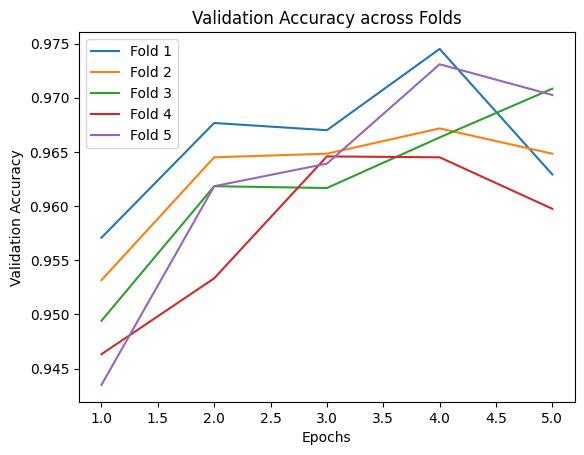

In [7]:
num_folds = 5
kfold = KFold(n_splits=num_folds)

val_accuracies = []  # Store validation accuracies across folds

for fold_num, (train_index, val_index) in enumerate(kfold.split(xtrainflatten)):
    x_train, x_val = xtrainflatten[train_index], xtrainflatten[val_index]
    y_train, y_val = ytrain[train_index], ytrain[val_index]

    model = keras.Sequential([
        keras.layers.Dense(533, input_shape=(784,), activation='tanh'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.002),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
    
    val_accuracies.append(history.history['val_accuracy'])  # Store validation accuracy

# Plot the validation accuracy across folds
val_accuracies = np.array(val_accuracies)
epochs = range(1, val_accuracies.shape[1] + 1)

for i, fold in enumerate(val_accuracies):
    plt.plot(epochs, fold, label=f'Fold {i + 1}')  # Label each curve with fold number

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy across Folds')
plt.legend()  # Show the legend
plt.show()

Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2033 - accuracy: 0.9375 - val_loss: 0.1270 - val_accuracy: 0.9630
Epoch 2/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0859 - accuracy: 0.9736 - val_loss: 0.1007 - val_accuracy: 0.9693
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0582 - accuracy: 0.9814 - val_loss: 0.0946 - val_accuracy: 0.9743
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0447 - accuracy: 0.9852 - val_loss: 0.0802 - val_accuracy: 0.9778
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0336 - accuracy: 0.9890 - val_loss: 0.1035 - val_accuracy: 0.9740
Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1975 - accuracy: 0.9396 - val_loss: 0.1085 - val_accuracy: 0.9668
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0850 - accuracy: 0.9731 - val_loss: 0.0928 - val_accuracy: 0.9

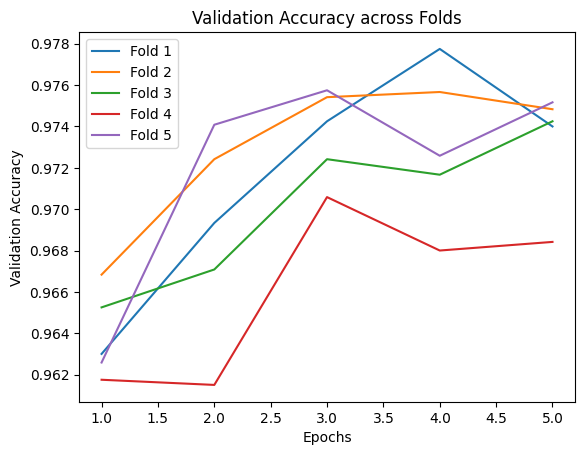

In [8]:
num_folds = 5
kfold = KFold(n_splits=num_folds)

val_accuracies = []  # Store validation accuracies across folds

for fold_num, (train_index, val_index) in enumerate(kfold.split(xtrainflatten)):
    x_train, x_val = xtrainflatten[train_index], xtrainflatten[val_index]
    y_train, y_val = ytrain[train_index], ytrain[val_index]

    model = keras.Sequential([
        keras.layers.Dense(533, input_shape=(784,), activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.002),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
    
    val_accuracies.append(history.history['val_accuracy'])  # Store validation accuracy

# Plot the validation accuracy across folds
val_accuracies = np.array(val_accuracies)
epochs = range(1, val_accuracies.shape[1] + 1)

for i, fold in enumerate(val_accuracies):
    plt.plot(epochs, fold, label=f'Fold {i + 1}')  # Label each curve with fold number

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy across Folds')
plt.legend()  # Show the legend
plt.show()